# 1- Initialisation

In [57]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [58]:
# Chargement des Data Sets
df15 = pd.read_csv('2015-building-energy-benchmarking.csv', low_memory=low_memory)
df16 = pd.read_csv('2016-building-energy-benchmarking.csv', low_memory=low_memory)

Le data set contient :
	- 3340 lignes et 47 colonnes.
	- 26512 valeurs manquantes, ce qui représente 16.89 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
3229,49735,2015,Multifamily LR (1-4),Low-Rise Multifamily,AURORA HOUSE,2291400310,"{'latitude': '47.70566954', 'longitude': '-122...",5,NORTHWEST,2012,1,4.0,54771,4305,50466,Multifamily Housing,Multifamily Housing,52596.0,NaN,NaN,NaN,NaN,NaN,77.0,46.5,49.5,98.4,101.6,2443284.0,2603080.0,0.0,365876.0,1248419.0,11949.0,1194917.0,0.0,72.16,1.22,No,NaN,Compliant,NaN,NaN,6.0,NaN,34.0,19582
646,1281,2015,NonResidential,Large Office,4545 15TH AVE NE,8816400020,"{'latitude': '47.6620958', 'longitude': '-122....",4,NORTHEAST,1960,1,3.0,113944,48510,65434,Office,Office,65434.0,NaN,NaN,NaN,NaN,NaN,1.0,273.9,273.9,860.1,860.1,17924416.0,17924416.0,0.0,5253311.0,17925041.0,1.0,120.0,0.0,124.96,0.42,No,NaN,Compliant,High Outlier,NaN,60.0,NaN,38.0,18383


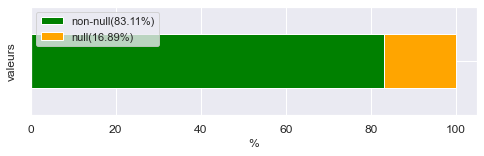

In [59]:
# Vérification de la structure du Data Set
verifier_taille(df15)
afficher_echantillon(df15)

Le data set contient :
	- 3376 lignes et 46 colonnes.
	- 19952 valeurs manquantes, ce qui représente 12.85 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1103,20858,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Union Bay Lofts,3218 EASTLAKE AVE E,Seattle,WA,98102.0,1959703145,3,NORTHEAST,47.65058,-122.32159,2008,1.0,6,35746,0,35746,"Multifamily Housing, Parking",Multifamily Housing,20148.0,Parking,15598.0,NaN,NaN,NaN,NaN,58.400002,58.400002,183.300003,183.300003,1176032.125,1176032.125,0.0,344675.3125,1176032.0,0.0,0.0,False,NaN,Compliant,NaN,8.20,0.23
998,20452,2016,Multifamily LR (1-4),Low-Rise Multifamily,Elizabeth James,109 23rd Ave. E.,Seattle,WA,98112.0,0955000480,3,Central,47.61971,-122.30287,1968,1.0,3,40779,0,40779,"Multifamily Housing, Parking",Multifamily Housing,38212.0,Parking,0.0,NaN,NaN,NaN,66.0,32.299999,34.099998,101.400002,107.099998,1234573.875,1303229.250,0.0,361832.9063,1234574.0,0.0,0.0,False,NaN,Compliant,NaN,8.61,0.21


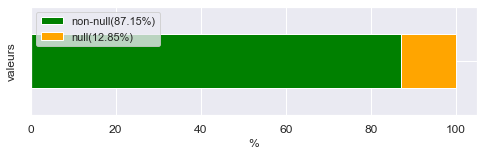

In [60]:
# Vérification de la structure du Data Set
verifier_taille(df16)
afficher_echantillon(df16)

In [61]:
nans = nan_cols(df15, 80)
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,83.23,560,16.77
1,ThirdLargestPropertyUseTypeGFA,2780,83.23,560,16.77
2,YearsENERGYSTARCertified,3230,96.71,110,3.29
3,Comment,3327,99.61,13,0.39
4,Outlier,3256,97.49,84,2.51
5,2010 Census Tracts,3116,93.29,224,6.71
6,City Council Districts,3127,93.62,213,6.38


In [62]:
nan_cols(df15)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.00,3340,100.00
1,DataYear,0,0.00,3340,100.00
2,BuildingType,0,0.00,3340,100.00
3,PrimaryPropertyType,0,0.00,3340,100.00
4,PropertyName,0,0.00,3340,100.00
5,TaxParcelIdentificationNumber,2,0.06,3338,99.94
6,Location,0,0.00,3340,100.00
7,CouncilDistrictCode,0,0.00,3340,100.00
8,Neighborhood,0,0.00,3340,100.00
9,YearBuilt,0,0.00,3340,100.00


In [63]:
nans = nan_cols(df16,80) 
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,82.35,596,17.65
1,ThirdLargestPropertyUseTypeGFA,2780,82.35,596,17.65
2,YearsENERGYSTARCertified,3257,96.48,119,3.52
3,Comments,3376,100.00,0,0.00
4,Outlier,3344,99.05,32,0.95


In [64]:
df15.Outlier.unique()

array([nan, 'High Outlier', 'Low Outlier'], dtype=object)

In [65]:
doublons(df15['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

In [66]:
doublons(df16['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

# Data Simplification & Cleanning

In [67]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'GHGEmissions(MetricTonsCO2e)', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']

df15s = df15[Cols]
df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']
df15s = renameCol(df15s, 'SiteEUI(kBtu)', 'TotalEnergy')
df15s = renameCol(df15s, 'TotalGHGEmissions', 'TotalEmission')

df15s

C:\Users\Shadow\AppData\Local\Temp/ipykernel_22464/3900532931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,Compliant,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,Compliant,NaN,9776630.4
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,Compliant,NaN,92928234.0
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.4,1936.34,7,DOWNTOWN,1926,1,10.0,Compliant,High Outlier,28231728.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,Compliant,NaN,14398789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,44650,Multifamily Housing,44650.0,71.0,25.6,7.97,2,DOWNTOWN,2000,1,4.0,Compliant,NaN,1143040.0
3336,50055,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,42393,Multifamily Housing,31748.0,98.0,48.6,30.69,4,NORTHEAST,2014,1,7.0,Compliant,NaN,2060299.8
3337,50057,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,319481,NaN,NaN,79.0,52.7,627.97,7,DOWNTOWN,2015,1,40.0,Compliant,NaN,16836648.7
3338,50058,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,48230,Multifamily Housing,22310.0,44.0,34.8,5.42,4,NORTHEAST,1981,1,3.0,Compliant,NaN,1678404.0


In [68]:
Cols = ['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']

 

df16s = df16[Cols]
df16s['SiteEUI(kBtu)'] = df16['SiteEUI(kBtu/sf)']*df16['PropertyGFATotal']
df16s = renameCol(df16s, 'SiteEUI(kBtu)', 'TotalEnergy')
df16s = renameCol(df16s, 'TotalGHGEmissions', 'TotalEmission')
df16s

C:\Users\Shadow\AppData\Local\Temp/ipykernel_22464/2886807637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16s['SiteEUI(kBtu)'] = df16['SiteEUI(kBtu/sf)']*df16['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),TotalEmission,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy
0,1,NonResidential,Hotel,Mayflower park hotel,88434,Hotel,88434.0,60.0,81.699997,249.98,7,DOWNTOWN,1927,1.0,12,Compliant,NaN,7.225058e+06
1,2,NonResidential,Hotel,Paramount Hotel,103566,Hotel,83880.0,61.0,94.800003,295.86,7,DOWNTOWN,1996,1.0,11,Compliant,NaN,9.818057e+06
2,3,NonResidential,Hotel,5673-The Westin Seattle,956110,Hotel,756493.0,43.0,96.000000,2089.28,7,DOWNTOWN,1969,1.0,41,Compliant,NaN,9.178656e+07
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,56.0,110.800003,286.43,7,DOWNTOWN,1926,1.0,10,Compliant,NaN,6.794256e+06
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),175580,Hotel,123445.0,75.0,114.800003,505.01,7,DOWNTOWN,1980,1.0,18,Compliant,NaN,2.015658e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,12294,Office,12294.0,46.0,69.099998,20.94,2,GREATER DUWAMISH,1990,1.0,1,Error - Correct Default Data,NaN,8.495154e+05
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,32.17,2,DOWNTOWN,2004,1.0,1,Compliant,NaN,9.504000e+05
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,223.54,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1,Compliant,NaN,5.765398e+06
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,22.11,1,GREATER DUWAMISH,1989,1.0,1,Compliant,NaN,7.191510e+05


Le data set contient :
	- 6716 lignes et 19 colonnes.
	- 15320 valeurs manquantes, ce qui représente 12.01 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy,TotalEmission
2570,26129,Multifamily LR (1-4),Low-Rise Multifamily,Morris Apartments,20340,Multifamily Housing,20340.0,69.0,65.599998,NaN,3,EAST,1916,1.0,3.0,Compliant,NaN,1.334304e+06,59.18
1277,21432,Nonresidential COS,Other,Fisher Pavilion,21018,Other,21018.0,NaN,83.800003,NaN,7,MAGNOLIA / QUEEN ANNE,2002,1.0,1.0,Compliant,NaN,1.761308e+06,24.62


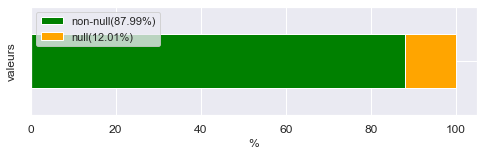

In [69]:
# Concat 2015 & 2016 data
df = pd.concat([df15s, df16s], axis=0)

verifier_taille(df)
afficher_echantillon(df)

In [70]:
df[df['ComplianceStatus']=='Not Compliant']

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,TotalEnergy,TotalEmission
767,19798,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,33166,NaN,NaN,NaN,NaN,NaN,4,NORTHEAST,1977,1.0,3.0,Not Compliant,NaN,NaN,NaN
1346,21548,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,40086,NaN,NaN,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1967,1.0,4.0,Not Compliant,NaN,NaN,NaN
1838,23508,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,53040,NaN,NaN,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1930,1.0,3.0,Not Compliant,NaN,NaN,NaN


In [71]:
df = df[df['ComplianceStatus']=='Compliant']
df = df.drop(columns=['ComplianceStatus'])
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,Hotel,88434.0,65.0,78.900000,249.43,7,DOWNTOWN,1927,1.0,12.0,NaN,6.977443e+06,NaN
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,Hotel,83880.0,51.0,94.400000,263.51,7,DOWNTOWN,1996,1.0,11.0,NaN,9.776630e+06,NaN
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,Hotel,757243.0,18.0,96.600000,2061.48,7,DOWNTOWN,1969,1.0,41.0,NaN,9.292823e+07,NaN
3,5,NonResidential,Hotel,HOTEL MAX,61320,Hotel,61320.0,1.0,460.400000,1936.34,7,DOWNTOWN,1926,1.0,10.0,High Outlier,2.823173e+07,NaN
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,Hotel,123445.0,67.0,120.100000,507.70,7,DOWNTOWN,1980,1.0,18.0,NaN,1.439879e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other,High Point Community Center,18261,Other - Recreation,18261.0,NaN,51.000000,NaN,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,NaN,9.313110e+05,20.33
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,16000,Other - Recreation,16000.0,NaN,59.400002,NaN,2,DOWNTOWN,2004,1.0,1.0,NaN,9.504000e+05,32.17
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,NaN,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,NaN,5.765398e+06,223.54
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,14101,Other - Recreation,6601.0,NaN,51.000000,NaN,1,GREATER DUWAMISH,1989,1.0,1.0,NaN,7.191510e+05,22.11


In [72]:
df[df['TotalEnergy'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission
62,87,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),53352,K-12 School,53352.0,NaN,NaN,NaN,1,SOUTHWEST,1948,1.0,2.0,Low Outlier,NaN,NaN
719,19694,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),37327,K-12 School,41191.0,NaN,NaN,NaN,3,CENTRAL,1925,1.0,2.0,NaN,NaN,NaN
1358,21570,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),34005,K-12 School,34005.0,NaN,NaN,NaN,5,NORTH,1950,1.0,1.0,NaN,NaN,NaN
1360,21578,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),41221,K-12 School,41221.0,NaN,NaN,NaN,1,SOUTHWEST,1949,1.0,1.0,Low Outlier,NaN,NaN
2108,24408,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),110830,K-12 School,110830.0,NaN,NaN,NaN,5,NORTHWEST,1953,1.0,1.0,NaN,NaN,NaN
2381,25361,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),43578,K-12 School,45370.0,NaN,NaN,NaN,4,NORTHEAST,1961,1.0,1.0,NaN,NaN,NaN
2406,25451,NonResidential,Restaurant\n,YALE STREET LANDING,26519,Restaurant,13592.0,NaN,NaN,NaN,3,LAKE UNION,1978,1.0,2.0,NaN,NaN,NaN


In [73]:
nans = valeurs_manquantes(df[['TotalEnergy',	'TotalEmission']])
nans

,TotalEnergy,TotalEmission
0,6.977443e+06,NaN
1,9.776630e+06,NaN
2,9.292823e+07,NaN
3,2.823173e+07,NaN
4,1.439879e+07,NaN
...,...,...
3339,2.028420e+06,NaN
1768,5.636544e+05,NaN
2321,7.715912e+05,NaN
2480,1.049490e+06,NaN


In [74]:
df = df.drop(index=nans.index)
valeurs_manquantes(df[['TotalEnergy',	'TotalEmission']])

,TotalEnergy,TotalEmission


In [75]:
nans = df[df['NumberofFloors'].isnull()]
nans

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission


In [76]:
df = df.drop(index=nans.index)
df[df['NumberofFloors'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission


Le data set contient :
	- 34 lignes et 18 colonnes.
	- 85 valeurs manquantes, ce qui représente 13.89 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission


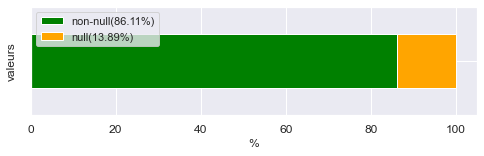

In [77]:
# Vérification de la structure du Data Set
verifier_taille(df)
afficher_echantillon(df)

In [78]:
nan_cols(df)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.0,34,100.0
1,BuildingType,0,0.0,34,100.0
2,PrimaryPropertyType,0,0.0,34,100.0
3,PropertyName,0,0.0,34,100.0
4,PropertyGFATotal,0,0.0,34,100.0
5,LargestPropertyUseType,0,0.0,34,100.0
6,LargestPropertyUseTypeGFA,0,0.0,34,100.0
7,ENERGYSTARScore,17,50.0,17,50.0
8,SiteEUI(kBtu/sf),0,0.0,34,100.0
9,GHGEmissions(MetricTonsCO2e),34,100.0,0,0.0


In [79]:
valeurs_manquantes(df)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission
767,19832,Multifamily LR (1-4),Low-Rise Multifamily,Atria Villa Apartments,40948,Multifamily Housing,32170.0,85.0,21.400000,NaN,7,MAGNOLIA / QUEEN ANNE,1978,1.0,4.0,NaN,8.762872e+05,4.80
1346,21569,Multifamily LR (1-4),Low-Rise Multifamily,Pinehurst Apartments,51387,Multifamily Housing,53972.0,81.0,21.900000,NaN,5,North,1978,1.0,4.0,NaN,1.125375e+06,8.25
1838,23561,Multifamily MR (5-9),Mid-Rise Multifamily,Traugott Terrace,39962,Multifamily Housing,39962.0,74.0,38.000000,NaN,7,DOWNTOWN,2003,1.0,7.0,NaN,1.518556e+06,45.08
3340,50070,NonResidential,Other,Tennis Center Sand Point,72000,Other - Recreation,72000.0,NaN,40.599998,NaN,4,NORTHEAST,2013,1.0,1.0,NaN,2.923200e+06,67.65
3342,50072,Multifamily MR (5-9),Mid-Rise Multifamily,Soren Apartments,121218,Multifamily Housing,91393.0,100.0,21.500000,NaN,6,BALLARD,2015,1.0,6.0,NaN,2.606187e+06,51.26
3343,50074,Multifamily MR (5-9),Mid-Rise Multifamily,Greenwood Place Apartments,59653,Multifamily Housing,49359.0,98.0,23.299999,NaN,5,NORTHWEST,2015,1.0,5.0,NaN,1.389915e+06,12.21
3344,50075,Multifamily MR (5-9),Mid-Rise Multifamily,Astro Apartments,260051,Multifamily Housing,145784.0,98.0,36.500000,NaN,7,MAGNOLIA / QUEEN ANNE,2015,1.0,7.0,NaN,9.491862e+06,124.18
3345,50076,Multifamily MR (5-9),Mid-Rise Multifamily,bridges@11th,233757,Multifamily Housing,187477.0,100.0,23.600000,NaN,4,NORTHEAST,2015,1.0,7.0,NaN,5.516665e+06,86.25
3346,50078,Multifamily HR (10+),High-Rise Multifamily,Cornish Commons,149976,Multifamily Housing,115768.0,99.0,33.599998,NaN,7,DOWNTOWN,2015,1.0,20.0,NaN,5.039193e+06,103.37
3347,50081,NonResidential,K-12 School,Hamlin Robinson School,45000,K-12 School,45728.0,77.0,29.000000,NaN,3,GREATER DUWAMISH,2015,1.0,3.0,NaN,1.305000e+06,9.24


# Analyse Explo

In [80]:
df.describe()

,OSEBuildingID,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,TotalEnergy,TotalEmission
count,34.000000,34.000000,34.000000,17.000000,34.000000,0.0,34.000000,34.000000,34.0,34.000000,3.400000e+01,34.000000
mean,47625.352941,80319.058824,62898.264706,85.411765,74.644118,NaN,4.441176,1994.882353,1.0,3.911765,4.471289e+06,102.945588
std,8213.898340,94670.294107,70271.813802,24.168830,97.633570,NaN,1.925761,29.965399,0.0,3.768833,8.686085e+06,185.741087
min,19832.000000,11285.000000,6601.000000,1.000000,21.100000,NaN,1.000000,1911.000000,1.0,1.000000,6.370344e+05,4.440000
25%,50078.750000,18258.750000,11755.750000,81.000000,29.475000,NaN,3.000000,1979.000000,1.0,1.000000,9.404707e+05,20.775000
50%,50093.500000,41175.500000,40988.000000,98.000000,45.450001,NaN,4.000000,2013.000000,1.0,3.500000,1.724220e+06,36.720000
75%,50206.250000,82533.750000,76769.250000,99.000000,62.174999,NaN,6.000000,2015.000000,1.0,6.000000,4.877312e+06,94.237500
max,50226.000000,345290.000000,325000.000000,100.000000,438.200012,NaN,7.000000,2015.000000,1.0,20.000000,4.989440e+07,1000.060000


In [81]:
Cols = ['BuildingType', 'PropertyGFATotal',	'CouncilDistrictCode',	'YearBuilt', 'NumberofFloors' , 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',	'ENERGYSTARScore',	'TotalEnergy',	'TotalEmission']

Cols = ['PropertyGFATotal',	'CouncilDistrictCode',	'YearBuilt', 'NumberofFloors' , 'LargestPropertyUseTypeGFA',	'ENERGYSTARScore',	'TotalEnergy',	'TotalEmission']

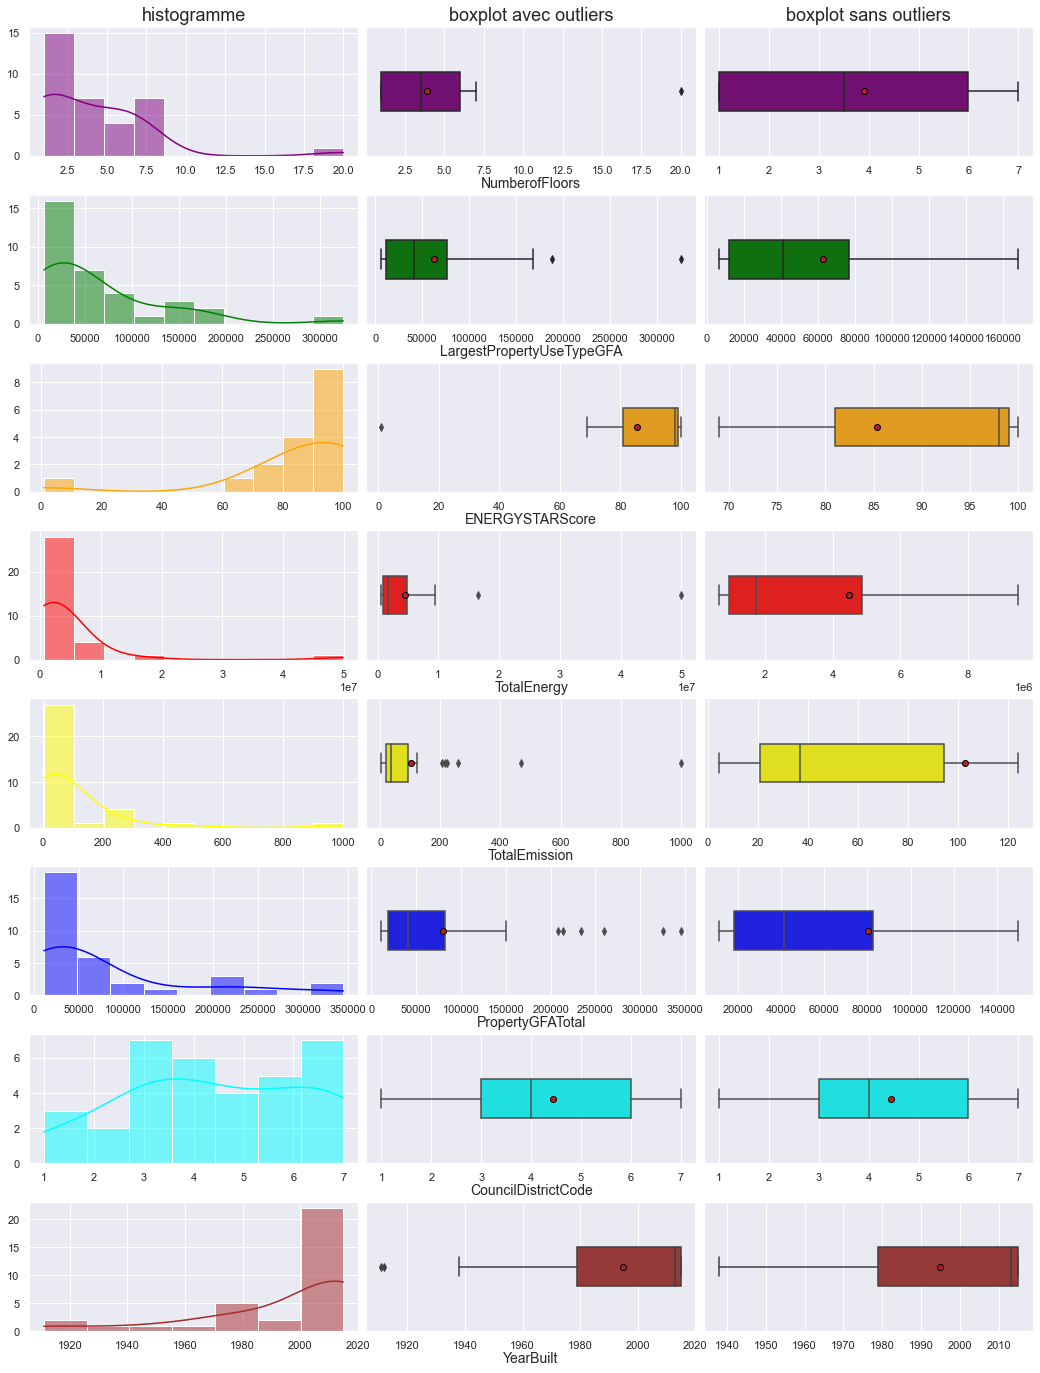

In [82]:
histo_distribution(df[Cols])

In [83]:
df[df['TotalEmission'] > 200]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,TotalEnergy,TotalEmission
3349,50084,Multifamily MR (5-9),Mid-Rise Multifamily,Rooster Apartments,213952,Multifamily Housing,154913.0,100.0,42.400002,NaN,4,NORTHEAST,2015,1.0,7.0,NaN,9.071565e+06,205.52
3354,50092,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,325000,Residence Hall/Dormitory,325000.0,69.0,50.700001,NaN,4,NORTHEAST,2015,1.0,7.0,NaN,1.647750e+07,467.90
3356,50094,NonResidential,Mixed Use Property,AIBS,345290,Laboratory,151523.0,NaN,144.500000,NaN,7,LAKE UNION,2015,1.0,6.0,NaN,4.989440e+07,1000.06
3365,50208,Nonresidential COS,Other,Ballard Pool,12769,Other - Recreation,10912.0,NaN,400.799988,NaN,6,BALLARD,1972,1.0,1.0,NaN,5.117815e+06,216.18
3367,50212,Nonresidential COS,Other,Conservatory Campus,23445,Other - Recreation,23445.0,NaN,254.899994,NaN,3,EAST,1912,1.0,1.0,NaN,5.976130e+06,259.22
3373,50224,Nonresidential COS,Other,Queen Anne Pool,13157,Other - Recreation,7583.0,NaN,438.200012,NaN,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,NaN,5.765398e+06,223.54


In [84]:
# afficher_correlations(df[df['PrimaryPropertyType']=='Hospital'], variables=Cols)

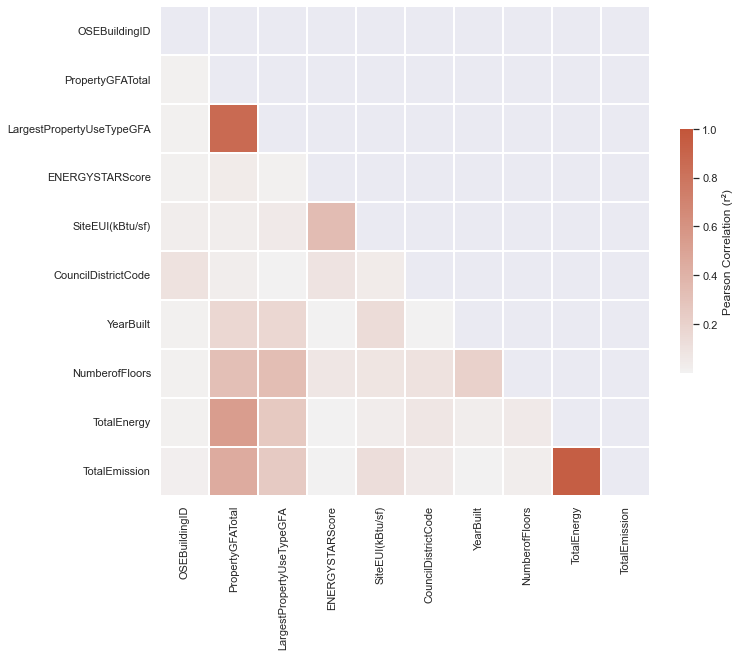

In [85]:
correlation_matrix(df)

# Learning

In [86]:
df['SiteEUI(kBtu)'].median()

KeyError: 'SiteEUI(kBtu)'

In [ ]:
df2 = df[df['TotalEnergy']<=df['TotalEnergy'].median()]

In [ ]:
XCols = ['PropertyGFATotal', 'CouncilDistrictCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'TotalEnergy']
y = 'TotalEnergy'
# X = MinMax_Scaled(df[XCols], frame=True)
X = df[XCols].sort_values(by=[y])

random_state = 0 #None

X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='min-max', scale_y=True)
X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='min-max')
# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state, scale='std')
# X_train, X_test, y_train, y_test = trainning_sets(X, y, random_state=random_state)

In [ ]:
valeurs_manquantes(X)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_train.std()

## Baselines

In [ ]:
from sklearn import dummy, metrics
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = dum.predict(X_test)

# Evaluate
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred, color='coral')


## Naive KNN Regressor

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred, color='coral')

In [ ]:
#-------------------------- GridSearchCV --------------------------
from sklearn import neighbors, model_selection

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':list(range(3,21))}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_mean_squared_log_error'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

y_pred = clf.predict(X_test)

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred, color='coral')

## SVR

In [ ]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test)


print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), "RMSE(%) : {:.2f}".format(100*(np.sqrt(metrics.mean_squared_error(y_test, y_pred))-y_test.min())/(y_test.max()-y_test.min())))
print("RMSLE : {:.2f}".format(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
print("R² : {:.2f}".format(metrics.r2_score(y_test, y_pred)), "RSE : {:.2f}".format(1-metrics.r2_score(y_test, y_pred)))
plt.scatter(y_test, y_pred, color='coral')